In [4]:
! pip install easy_text_clustering==1.3.1

  Attempting uninstall: easy_text_clustering
    Found existing installation: easy_text_clustering 1.3.0
    Uninstalling easy_text_clustering-1.3.0:
      Successfully uninstalled easy_text_clustering-1.3.0


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

[I 2024-11-23 17:08:18,831] A new study created in memory with name: no-name-34fce343-858e-4319-ac30-95b359794e76
[I 2024-11-23 17:08:23,620] Trial 0 finished with value: 5.991440466035362 and parameters: {'umap_n_neighbors': 39, 'umap_min_dist': 0.2015473805586796, 'umap_metric': 'euclidean', 'hdbscan_min_cluster_size': 54, 'hdbscan_metric': 'euclidean', 'cluster_selection_epsilon': 0.20633164566103324}. Best is trial 0 with value: 5.991440466035362.
[I 2024-11-23 17:08:26,059] Trial 1 finished with value: 2.30641953607358 and parameters: {'umap_n_neighbors': 42, 'umap_min_dist': 0.6529487633500304, 'umap_metric': 'cosine', 'hdbscan_min_cluster_size': 63, 'hdbscan_metric': 'euclidean', 'cluster_selection_epsilon': 0.9898623098553195}. Best is trial 0 with value: 5.991440466035362.
[I 2024-11-23 17:08:27,988] Trial 2 finished with value: 4.7007025510622515 and parameters: {'umap_n_neighbors': 19, 'umap_min_dist': 0.2934478240100932, 'umap_metric': 'cosine', 'hdbscan_min_cluster_size': 

Best Parameters: {'umap_n_neighbors': 10, 'umap_min_dist': 0.13614387440354894, 'umap_metric': 'euclidean', 'hdbscan_min_cluster_size': 36, 'hdbscan_metric': 'euclidean', 'cluster_selection_epsilon': 0.12109297926618443}
Best Score: 11.151849163654028


INFO:root:Clustering...


Using HDBSCAN params={'min_cluster_size': 36, 'metric': 'euclidean', 'cluster_selection_epsilon': 0.12109297926618443}


AttributeError: 'NoneType' object has no attribute 'keys'

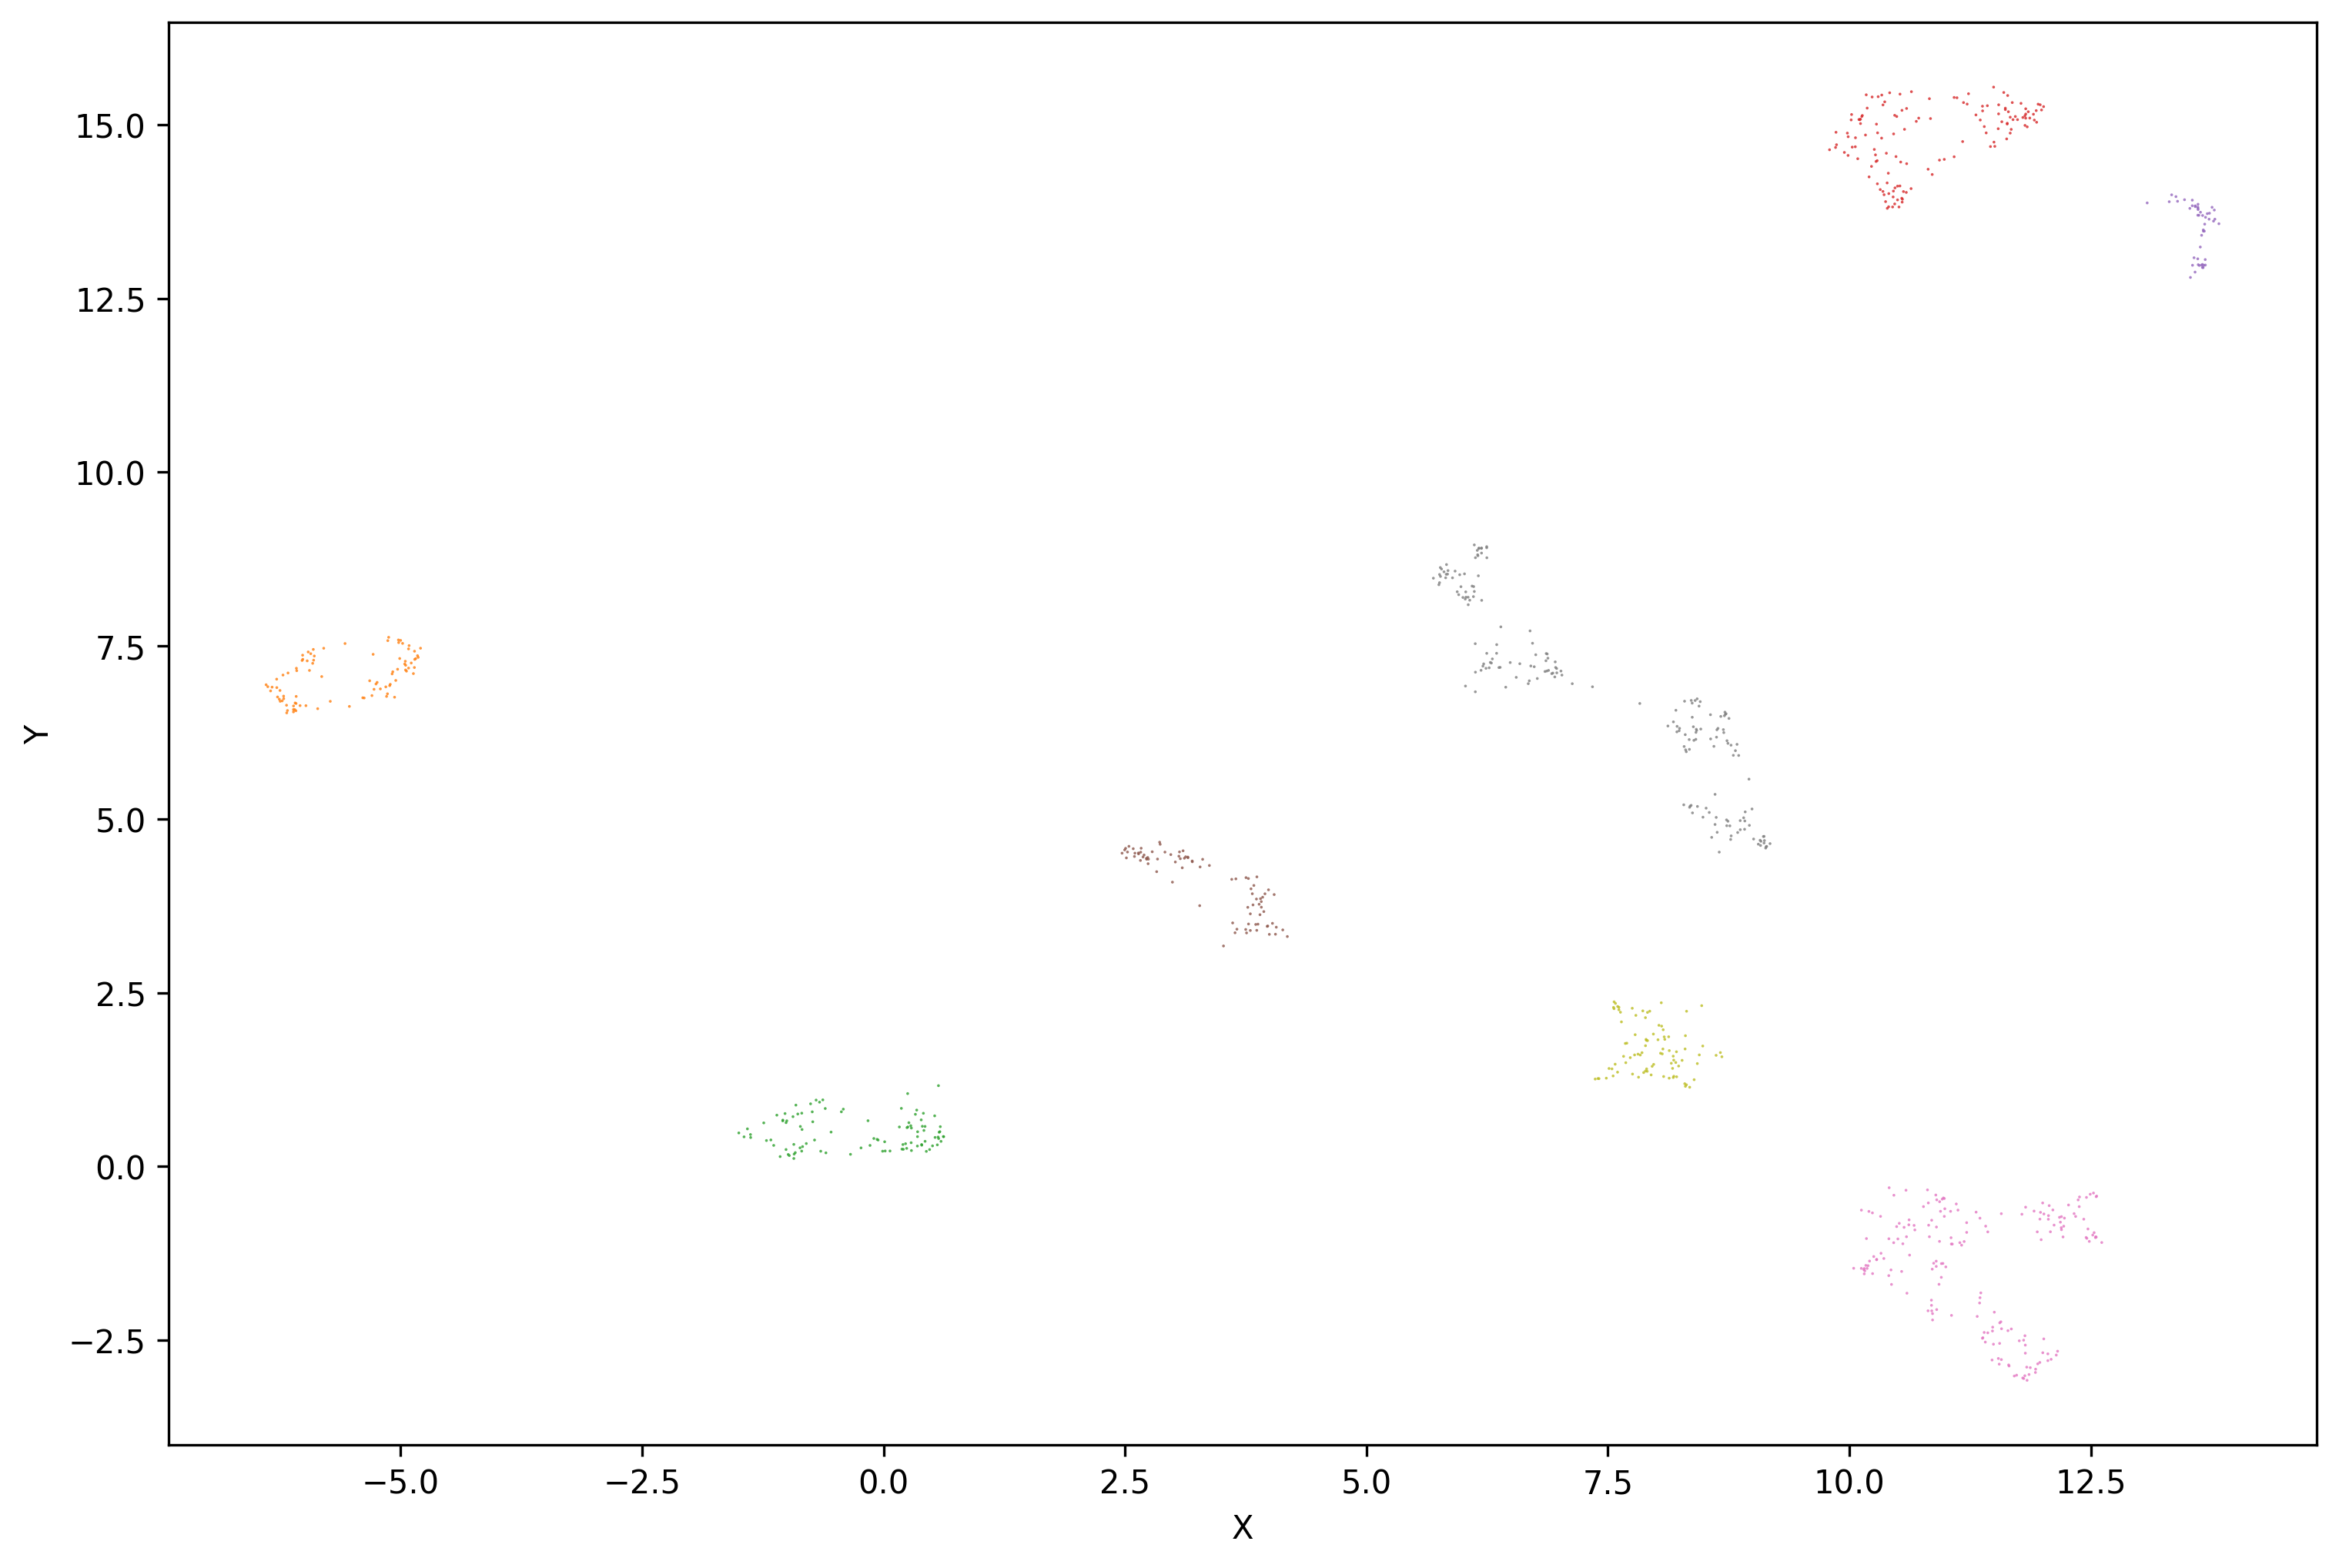

In [5]:
from datasets import load_dataset
from easy_text_clustering.clusterer import ClusterClassifier

SAMPLE = 100_000

texts = load_dataset('billingsmoore/text-clustering-example-data', split="train")['text']

cc = ClusterClassifier(summary_create=False)

cc.optimize_fit(texts)

cc.show()

In [6]:
from easy_text_clustering.optimizer import Optimizer

opt = Optimizer()

umap_args, hdbscan_args = opt.fit(texts)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

[I 2024-11-23 17:09:20,800] A new study created in memory with name: no-name-7ad2fb7d-979f-40a5-9fdd-302d174577b7
[I 2024-11-23 17:09:22,675] Trial 0 finished with value: 2.1512078341168257 and parameters: {'umap_n_neighbors': 43, 'umap_min_dist': 0.689005090071781, 'umap_metric': 'euclidean', 'hdbscan_min_cluster_size': 44, 'hdbscan_metric': 'euclidean', 'cluster_selection_epsilon': 0.9935248547144893}. Best is trial 0 with value: 2.1512078341168257.
[I 2024-11-23 17:09:24,622] Trial 1 finished with value: 2.1385415809838957 and parameters: {'umap_n_neighbors': 16, 'umap_min_dist': 0.4439424014910709, 'umap_metric': 'cosine', 'hdbscan_min_cluster_size': 72, 'hdbscan_metric': 'cosine', 'cluster_selection_epsilon': 0.49320190921010343}. Best is trial 0 with value: 2.1512078341168257.
[I 2024-11-23 17:09:26,319] Trial 2 finished with value: 2.442865242317098 and parameters: {'umap_n_neighbors': 5, 'umap_min_dist': 0.5173106140409172, 'umap_metric': 'cosine', 'hdbscan_min_cluster_size': 8

Best Parameters: {'umap_n_neighbors': 33, 'umap_min_dist': 0.022273522867157818, 'umap_metric': 'euclidean', 'hdbscan_min_cluster_size': 10, 'hdbscan_metric': 'euclidean', 'cluster_selection_epsilon': 0.4717241077846027}
Best Score: 24.512428478690918


In [7]:
! pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached hdbscan-0.8.40-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
Using cached hdbscan-0.8.40-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.2 MB)


In [8]:
from bertopic import BERTopic
from sklearn.cluster import HDBSCAN
from umap import UMAP

umap_model = UMAP(**umap_args)
hdbscan_model = HDBSCAN(**hdbscan_args)
topic_model = BERTopic(umap_model=umap_model,
                       hdbscan_model=hdbscan_model).fit(texts)


INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cuda
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


In [12]:
topic_model.visualize_documents(texts)

Batches:   0%|          | 0/29 [00:00<?, ?it/s]